In [29]:
import pandas as pd
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [35]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
!ls "/content/drive/My Drive"
DIR = Path.cwd() / 'drive' / 'MyDrive'
CDEC = DIR / 'dreamer_folsom' / 'data' / 'cdec'
drive = CDEC.resolve()
print(drive)
print([x.name for x in CDEC.iterdir() if x.is_file()])
# !ls drive

 admin		     c_paper	      pres      spatial_rl  'WRR outline.gdoc'
 cesm2_autoencoder   deep_folsom      random    tutoring
'Colab Notebooks'    dreamer_folsom   reviews   writing
/content/drive/MyDrive/dreamer_folsom/data/cdec
['cdec_proc.ipynb', 'folsom-daily-w2016.csv', 'fol_storage_cdec_1985_present.csv', 'fol_outflow_cdec_1987_present.csv', 'fol_inflow_cdec_1990_present.csv']


In [163]:
storage_raw = pd.read_csv(CDEC / 'fol_storage_cdec_1985_present.csv',header=0,index_col=0,)
print(storage.dtypes)
inflow_raw = pd.read_csv(CDEC / 'fol_inflow_cdec_1990_present.csv',header=0,index_col=0,)
outflow_raw = pd.read_csv(CDEC / 'fol_outflow_cdec_1987_present.csv',header=0,index_col=0,)


float64


In [191]:
import numpy as np
storage = pd.Series(name='storage_af',data=np.full(shape=len(storage_raw),fill_value=storage_raw['VALUE'].values,),index=pd.to_datetime(storage_raw['OBS DATE'].values))
storage = storage.apply(pd.to_numeric, errors='coerce').loc['1996':'2023'].interpolate(method='linear')
storage.index = storage.index.normalize()
print(storage.isna().sum()) # there was 1 NaN before interpolation

0


<Axes: >

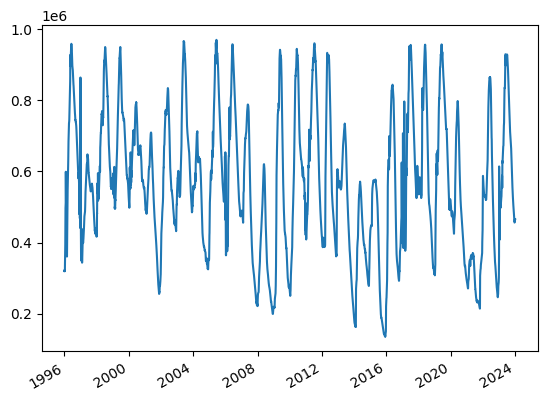

In [192]:
import matplotlib.pyplot as plt
storage.plot()

In [193]:
inflow = pd.Series(name='inflow_cfs',data=np.full(shape=len(inflow_raw),fill_value=inflow_raw['VALUE'].values,),index=pd.to_datetime(inflow_raw['OBS DATE'].values))
inflow = inflow.apply(pd.to_numeric, errors='coerce').loc['1996':'2023'].interpolate(method='linear')
inflow.index = inflow.index.normalize()
#print(inflow[inflow.isna()== True])#.sum()) # 20 non-contiguous dates were NaN before interpolation

<Axes: >

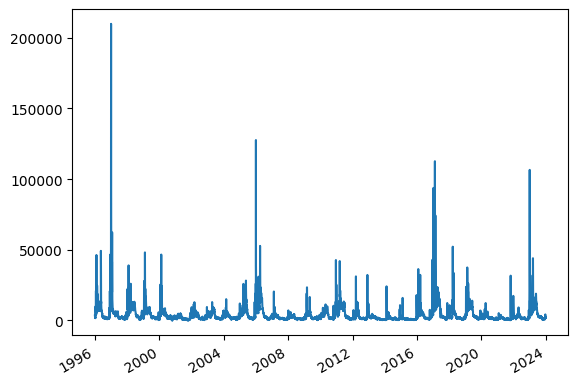

In [194]:
inflow.plot()

In [195]:
outflow = pd.Series(name='outflow_cfs',data=np.full(shape=len(outflow_raw),fill_value=outflow_raw['VALUE'].values,),index=pd.to_datetime(outflow_raw['OBS DATE'].values))
outflow = outflow.apply(pd.to_numeric, errors='coerce').loc['1996':'2023'].interpolate(method='pchip') # 1999-12-31 to 2000-01-23 are contiguous NaNs filled linearly
outflow.index = outflow.index.normalize()
# print(outflow[outflow.isna()== True])#.sum()) # outside above comment, 20 non-contiguous dates were NaN before interpolation

<Axes: >

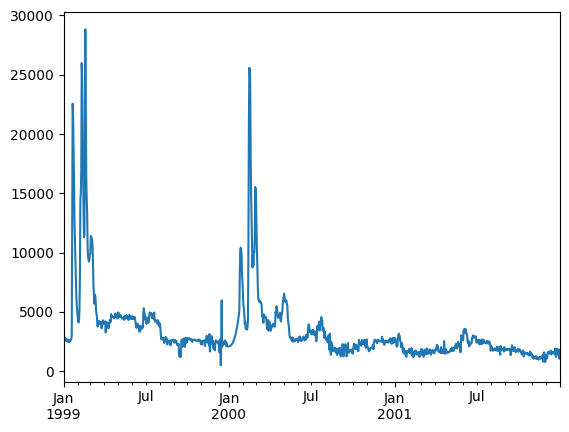

In [196]:
outflow['1999':'2001'].plot()

In [202]:
print(inflow[inflow.index.duplicated()])

1998-04-05   8231.000000
Name: inflow_cfs, dtype: float64


In [204]:
# remove duplicate indices and concat
inflow_cat = inflow[~inflow.index.duplicated()]
outflow_cat = outflow[~outflow.index.duplicated()]
storage_cat = storage[~storage.index.duplicated()]
dataset = pd.concat([inflow_cat,outflow_cat,storage_cat], axis=1)
print(dataset.isna().sum())
print(dataset[dataset.isnull().any(axis=1) == True])
dataset = dataset.interpolate(method='linear').round(decimals=2)
dataset.index = dataset.index.normalize()
print(dataset)
dataset.to_csv(CDEC / 'fol_cdec_1996_2023.csv')

inflow_cfs     1
outflow_cfs    1
storage_af     3
dtype: int64
            inflow_cfs  outflow_cfs    storage_af
1996-03-16         NaN          NaN 532800.000000
2023-09-12 2183.500000  3261.000000           NaN
2023-11-21  998.000000  1930.103926           NaN
2023-12-07 1081.000000  2187.000000           NaN
            inflow_cfs  outflow_cfs    storage_af
1996-01-01 3470.000000  2510.000000 319648.000000
1996-01-02 2695.000000  2417.000000 320184.000000
1996-01-03 2932.000000  2442.000000 321136.000000
1996-01-04 2563.000000  2287.000000 321671.000000
1996-01-05 2380.000000  2048.000000 322326.000000
...                ...          ...           ...
2023-12-27 1803.000000  2034.000000 464852.000000
2023-12-28 2065.000000  2214.000000 464550.000000
2023-12-29 1825.000000  1972.000000 464248.000000
2023-12-30 2345.000000  2002.000000 464928.000000
2023-12-31 1993.000000  1911.000000 465081.000000

[10226 rows x 3 columns]


In [199]:
del inflow_cat, outflow_cat, storage_cat